In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder as LE
le = LE()
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
import sys 
import os
sys.path.append(os.path.abspath("../src"))

import functions as fnc

ModuleNotFoundError: No module named 'xgboost'

In [65]:
data = pd.read_csv('../data/processed/train.csv')
test_data = pd.read_csv('../data/processed/test.csv')

In [66]:
columns_for_modelling = ['Pclass',
                         'Sex',
 'SibSp',
 'Parch',
 'Embarked',
 'J_missing_age',
 'Age',
 'Fare',
 'J_title_grouped',
 'J_nrelatives',
 'J_ticket_prefix',
 'J_ticket_location',
 'J_cabin_letter',
 'J_n_siblings_spouses']

male      266
female    152
Name: Sex, dtype: int64

In [69]:
from sklearn.preprocessing import OrdinalEncoder

# Create encoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',
                                 unknown_value=-1)

In [74]:
data['Sex'] = ordinal_encoder.fit_transform(data['Sex'].values.reshape(-1, 1))
test_data['Sex'] = ordinal_encoder.transform(test_data['Sex'].values.reshape(-1, 1))

data['Embarked'] = ordinal_encoder.fit_transform(data['Embarked'].values.reshape(-1, 1))
test_data['Embarked'] = ordinal_encoder.transform(test_data['Embarked'].values.reshape(-1, 1))

data['J_title_grouped'] = ordinal_encoder.fit_transform(data['J_title_grouped'].values.reshape(-1, 1))
test_data['J_title_grouped'] = ordinal_encoder.transform(test_data['J_title_grouped'].values.reshape(-1, 1))

data['J_ticket_prefix'] = ordinal_encoder.fit_transform(data['J_ticket_prefix'].values.reshape(-1, 1))
test_data['J_ticket_prefix'] = ordinal_encoder.transform(test_data['J_ticket_prefix'].values.reshape(-1, 1))

data['J_ticket_location'] = ordinal_encoder.fit_transform(data['J_ticket_location'].values.reshape(-1, 1))
test_data['J_ticket_location'] = ordinal_encoder.transform(test_data['J_ticket_location'].values.reshape(-1, 1))

data['J_cabin_letter'] = ordinal_encoder.fit_transform(data['J_cabin_letter'].values.reshape(-1, 1))
test_data['J_cabin_letter'] = ordinal_encoder.transform(test_data['J_cabin_letter'].values.reshape(-1, 1))


In [75]:
df_train_train, df_train_test= train_test_split(data, test_size = 0.3, random_state = 656)

In [76]:
df_train.shape, df_train_train.shape

((623, 23), (623, 24))

In [77]:
df_train['Survived'].value_counts(dropna= False)

0    394
1    229
Name: Survived, dtype: int64

In [78]:
clf = XGBClassifier(n_estimators = 500,
                   max_depth = 5, 
                   learning_rate = 0.05,
                   gamma = 1 ,
                   reg_alpha= 0,
                   reg_lambda = 1,
                   scale_pos_weight = df_train[df_train['Survived']==1].shape[0]/df_train[df_train['Survived']==0].shape[0],
                   random_state = 123,
                   colsample_bytree = 0.8,
                    objective="binary:logistic",
                   eval_metric = 'auc')

In [113]:
clf.fit(df_train_train[columns_for_modelling], 
        df_train_train['Survived'], 
        eval_set = [(df_train_test[columns_for_modelling], df_train_test['Survived'])],
        early_stopping_rounds = 20)

[0]	validation_0-auc:0.86021
[1]	validation_0-auc:0.85969
[2]	validation_0-auc:0.86180
[3]	validation_0-auc:0.86283
[4]	validation_0-auc:0.86323
[5]	validation_0-auc:0.86363
[6]	validation_0-auc:0.87242
[7]	validation_0-auc:0.87271
[8]	validation_0-auc:0.87020
[9]	validation_0-auc:0.86968
[10]	validation_0-auc:0.87142
[11]	validation_0-auc:0.87182
[12]	validation_0-auc:0.87088
[13]	validation_0-auc:0.87134
[14]	validation_0-auc:0.87065
[15]	validation_0-auc:0.87100
[16]	validation_0-auc:0.87020
[17]	validation_0-auc:0.87077
[18]	validation_0-auc:0.86980
[19]	validation_0-auc:0.86991
[20]	validation_0-auc:0.87251
[21]	validation_0-auc:0.87305
[22]	validation_0-auc:0.87259
[23]	validation_0-auc:0.87314
[24]	validation_0-auc:0.87259
[25]	validation_0-auc:0.87248
[26]	validation_0-auc:0.87060
[27]	validation_0-auc:0.87008
[28]	validation_0-auc:0.86985
[29]	validation_0-auc:0.87068
[30]	validation_0-auc:0.86940
[31]	validation_0-auc:0.86960
[32]	validation_0-auc:0.86940
[33]	validation_0-au

d:\titanic\venv\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

In [114]:
results = {'train': roc_auc_score(df_train_train['Survived'],clf.predict_proba(df_train_train[columns_for_modelling])[:,1]),
          'val': roc_auc_score(df_train_test['Survived'],clf.predict_proba(df_train_test[columns_for_modelling])[:,1])}

In [115]:
results['train']

0.9142375811850243

In [116]:
data['clf_score'] = clf.predict_proba(data[columns_for_modelling])[:,1]
data['train_val'] = 'train'
data.loc[data['PassengerId'].isin(df_train_test['PassengerId'].to_list()),'train_val'] = 'val'

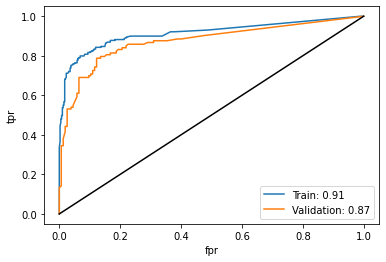

In [117]:
fpr,tpr,thresh = roc_curve(df_train_train['Survived'],clf.predict_proba(df_train_train[columns_for_modelling])[:,1])
plt.plot(fpr, tpr, label='Train: {}'.format(results['train'].round(2))) 
fpr,tpr,thresh = roc_curve(df_train_test['Survived'],clf.predict_proba(df_train_test[columns_for_modelling])[:,1])
plt.plot(fpr, tpr, label = 'Validation: {}'.format(results['val'].round(2))) 
plt.plot([0,1], [0,1], color='black')
plt.legend();
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.show()

In [110]:
def get_scoreband_Summary(df, target, score_col, n_scorebands):
    df['scoreband'] = pd.qcut(df[score_col], n_scorebands, duplicates='drop')
    
    res = df.groupby('scoreband')[target].value_counts().unstack()
    res = res.fillna(0)
    res['Survival Rate'] = 100*res.loc[:,1]/(res.loc[:,1]+res.loc[:,0])
    return res

In [112]:
get_scoreband_Summary(data[data['train_val']=='train'] , 'Survived', 'clf_score', 10).round(2)

C:\Users\jack.gorton\AppData\Local\Temp\ipykernel_24992\309134982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scoreband'] = pd.qcut(df[score_col], n_scorebands, duplicates='drop')


Survived,0,1,Survival Rate
scoreband,,,
"(0.19, 0.192]",202.0,16.0,7.34
"(0.192, 0.193]",43.0,2.0,4.44
"(0.193, 0.242]",46.0,5.0,9.80
"(0.242, 0.326]",48.0,12.0,20.00
"(0.326, 0.413]",40.0,22.0,35.48
"(0.413, 0.703]",11.0,51.0,82.26
"(0.703, 0.762]",4.0,58.0,93.55
"(0.762, 0.797]",0.0,63.0,100.00


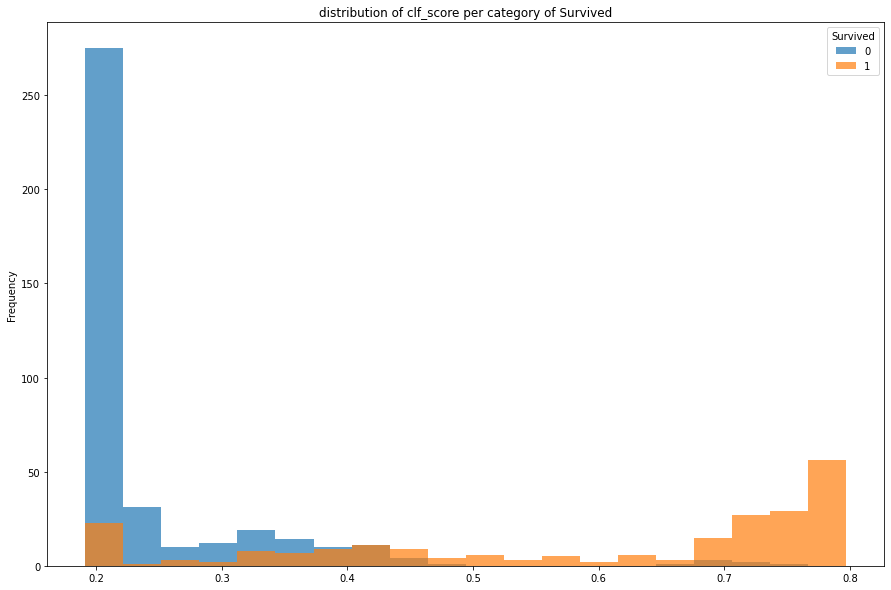

In [123]:
fnc.plot_distro_per_cat(data[data['train_val']=='train'], 'clf_score', 'Survived', plt_args = {'alpha': 0.7, 'bins': 20})

In [ ]:
# shap values
# pdp
# hyperparam tune
# cross val
# compare what someone with low and high score looks like